# Crop Recommendation

- Source for dataset [link](https://www.kaggle.com/atharvaingle/crop-recommendation-dataset)
- Motive of this plugin is to suggest farmer the suitable crop to grow based on
    - Soil N-P-K values
    - temeperature
    - humidity
    - ph of soil
    - average annual rainfall

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [2]:
df = pd.read_csv('../Datasets/Soil.csv')

In [3]:
df.size

17600

In [4]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
df = df.rename(columns={"label":"crop"})

In [6]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


## Data Visualization

In [9]:
sns.set_style('darkgrid')

df_lim = df.sample(n=500, random_state=42) #Using random limited data 

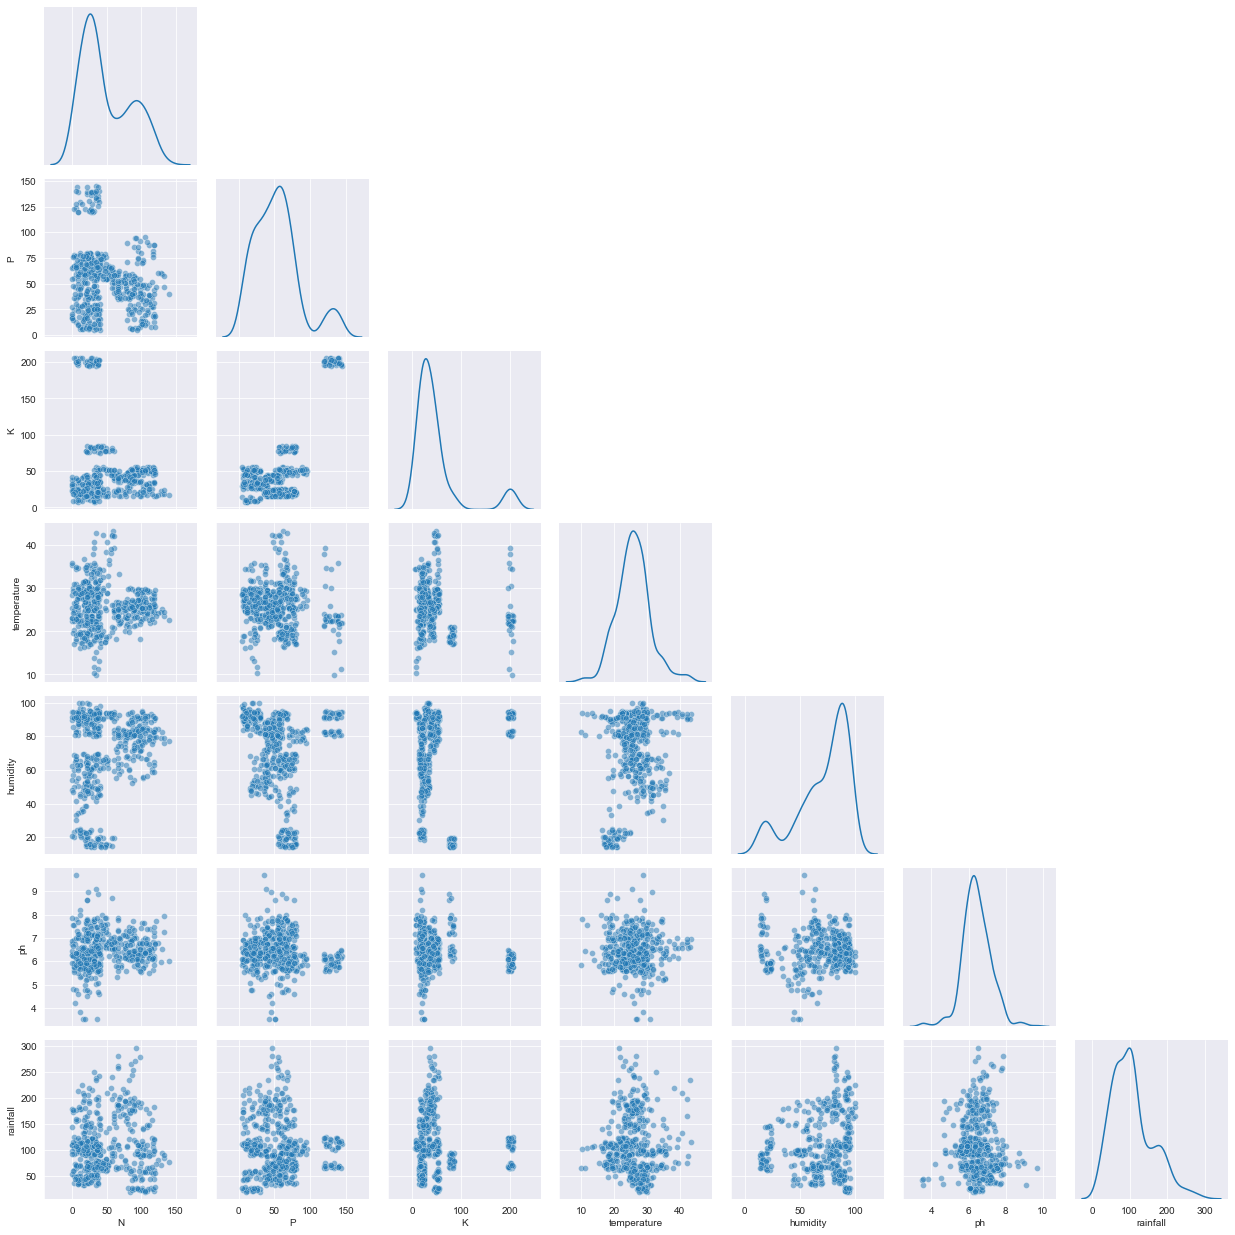

In [10]:
g = sns.PairGrid(df_lim, diag_sharey=False,corner=True);
g.map_offdiag(sns.scatterplot, alpha=.5)
g.map_diag(sns.kdeplot) #plots a pairplot for our data

### cleaning

- target variable in the dataset has some trailing white spaces, which will cause error

In [11]:
df=df.apply(lambda x:x.str.strip() if x.dtype=="object" else x) #removing white spaces

### Classes

In [12]:
categorical_data = ['crop']
for label in categorical_data:
    print(label ,': ', len(df[label].unique()))

crop :  22


In [13]:
df['crop'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: crop, dtype: int64

In [14]:
df.head(1)

,N,P,K,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice


### Segregating and splitting the data for training

In [15]:
X=df.loc[:, df.columns != 'crop']
y=df['crop']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15,random_state=42)

## Training

#### Random Forest Classifier

In [17]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=0, n_estimators=50)

In [18]:
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [19]:
classifier.score(X_test, y_test)

0.9939393939393939

In [20]:
y_pred = classifier.predict(X_test)

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        17
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        25
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        13
      cotton       1.00      1.00      1.00         9
      grapes       1.00      1.00      1.00        10
        jute       0.88      1.00      0.94        15
 kidneybeans       1.00      1.00      1.00        16
      lentil       1.00      1.00      1.00         8
       maize       1.00      1.00      1.00        15
       mango       1.00      1.00      1.00        13
   mothbeans       1.00      1.00      1.00        15
    mungbean       1.00      1.00      1.00        13
   muskmelon       1.00      1.00      1.00        15
      orange       1.00      1.00      1.00        11
      papaya       1.00    

In [22]:
classifier.predict([[11, 27, 30, 27.8, 49, 6.3, 89.85]])[0]

'mango'

In [23]:
classifier.predict([[78, 42, 42, 20.130, 81.604,7.62, 262.717]])[0]

'rice'

## Using K-Fold cross validation

- since the size of dataset is not huge K-Fold cross validation has been used to assess the model performance

In [24]:
from sklearn.model_selection import ShuffleSplit,cross_val_score


cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(classifier, X, y, cv=cv)

array([0.99772727, 0.99318182, 0.99090909, 0.99318182, 0.99545455])

## Saving the model

In [25]:
import joblib

with open('../Web_App/model_files/crop_prediction.joblib','wb') as f:
    joblib.dump(classifier,f)